In [77]:
#importing the necessary libarries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder


In [78]:
import missingno as msno


In [79]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics

In [80]:
#Importing the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [81]:
pd.set_option('display.max_columns',100)

In [82]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [83]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [84]:
train_df.shape

(1168, 81)

In [85]:
#getting an overview of the dtaset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [86]:
train_df.columns[train_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [87]:
for i in train_df.columns:
    print(i,'-----', train_df[i].isnull().sum())
    print()

Id ----- 0

MSSubClass ----- 0

MSZoning ----- 0

LotFrontage ----- 214

LotArea ----- 0

Street ----- 0

Alley ----- 1091

LotShape ----- 0

LandContour ----- 0

Utilities ----- 0

LotConfig ----- 0

LandSlope ----- 0

Neighborhood ----- 0

Condition1 ----- 0

Condition2 ----- 0

BldgType ----- 0

HouseStyle ----- 0

OverallQual ----- 0

OverallCond ----- 0

YearBuilt ----- 0

YearRemodAdd ----- 0

RoofStyle ----- 0

RoofMatl ----- 0

Exterior1st ----- 0

Exterior2nd ----- 0

MasVnrType ----- 7

MasVnrArea ----- 7

ExterQual ----- 0

ExterCond ----- 0

Foundation ----- 0

BsmtQual ----- 30

BsmtCond ----- 30

BsmtExposure ----- 31

BsmtFinType1 ----- 30

BsmtFinSF1 ----- 0

BsmtFinType2 ----- 31

BsmtFinSF2 ----- 0

BsmtUnfSF ----- 0

TotalBsmtSF ----- 0

Heating ----- 0

HeatingQC ----- 0

CentralAir ----- 0

Electrical ----- 0

1stFlrSF ----- 0

2ndFlrSF ----- 0

LowQualFinSF ----- 0

GrLivArea ----- 0

BsmtFullBath ----- 0

BsmtHalfBath ----- 0

FullBath ----- 0

HalfBath ----- 0



In [88]:
train_df.drop(columns = ['MiscFeature','PoolQC','Alley'],axis = 1, inplace = True)
train_df.shape

(1168, 78)

In [89]:
#Filling a null value
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median())

In [90]:
def fill(x):
    train_df[x] = train_df[x].fillna(train_df[x].mode()[0])

In [91]:
n = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'GarageFinish','GarageQual','GarageCond','Fence']

In [92]:
for i in n:
    fill(i)

In [93]:
train_df.columns[train_df.isnull().any()]

Index([], dtype='object')

In [94]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

In [95]:
cat_col = []
for col in train_df:
    if train_df[col].dtype == 'object':
        cat_col.append(col)

In [96]:
le = LabelEncoder()
for i in cat_col:
    train_df[i] = le.fit_transform(train_df[i])

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   int32  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   int32  
 6   LotShape       1168 non-null   int32  
 7   LandContour    1168 non-null   int32  
 8   Utilities      1168 non-null   int32  
 9   LotConfig      1168 non-null   int32  
 10  LandSlope      1168 non-null   int32  
 11  Neighborhood   1168 non-null   int32  
 12  Condition1     1168 non-null   int32  
 13  Condition2     1168 non-null   int32  
 14  BldgType       1168 non-null   int32  
 15  HouseStyle     1168 non-null   int32  
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [98]:
x = train_df.drop('SalePrice',axis=1)
y = train_df.SalePrice

In [99]:
best_feature = SelectKBest(score_func = f_classif, k =60)
fit = best_feature.fit(x,y)

In [100]:
score = pd.DataFrame(fit.scores_)
column = pd.DataFrame(x.columns)

In [101]:
feature_score = pd.concat([column,score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(40,'Scores')

,Feature Name,Scores
16,OverallQual,5.303071
72,MiscVal,3.564855
26,ExterQual,3.514221
45,GrLivArea,2.977506
29,BsmtQual,2.876879
52,KitchenQual,2.617125
60,GarageCars,2.578547
48,FullBath,2.435854
61,GarageArea,2.316328
59,GarageFinish,2.187163


In [102]:
top = train_df[['OverallQual','MiscVal','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath',
             'GarageArea','GarageFinish','YearBuilt','1stFlrSF','TotalBsmtSF','MasVnrArea','Street','LotArea',
             'YearRemodAdd','GarageYrBlt','Heating','TotRmsAbvGrd','MSZoning','Fireplaces','CentralAir',
             'Foundation','BsmtFinSF1','2ndFlrSF','OpenPorchSF','LotShape','BsmtUnfSF','HeatingQC','HalfBath',
             'Neighborhood','WoodDeckSF','BsmtExposure','FireplaceQu','BsmtCond','RoofMatl','MasVnrType',
             'GarageType','BedroomAbvGr','SalePrice']]

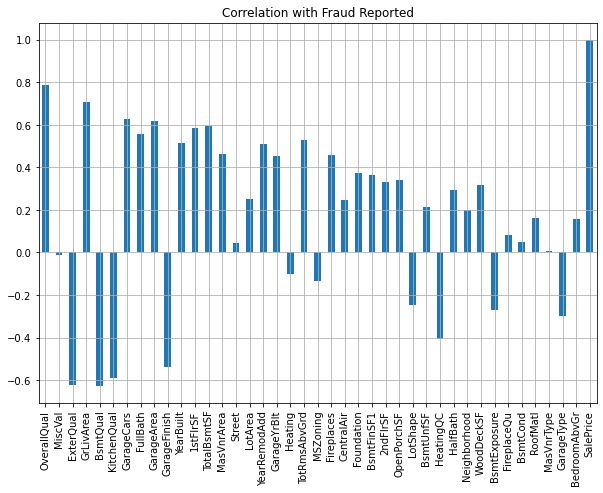

In [103]:
top.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation with Fraud Reported')
plt.show()

In [104]:
## MasVnrType, MiscVal, are the least related as compared to other variables. I will drop thse columns

In [105]:
top.drop(columns = ['MasVnrType','MiscVal'],axis = 1, inplace = True)

In [106]:
corr = top.corr()

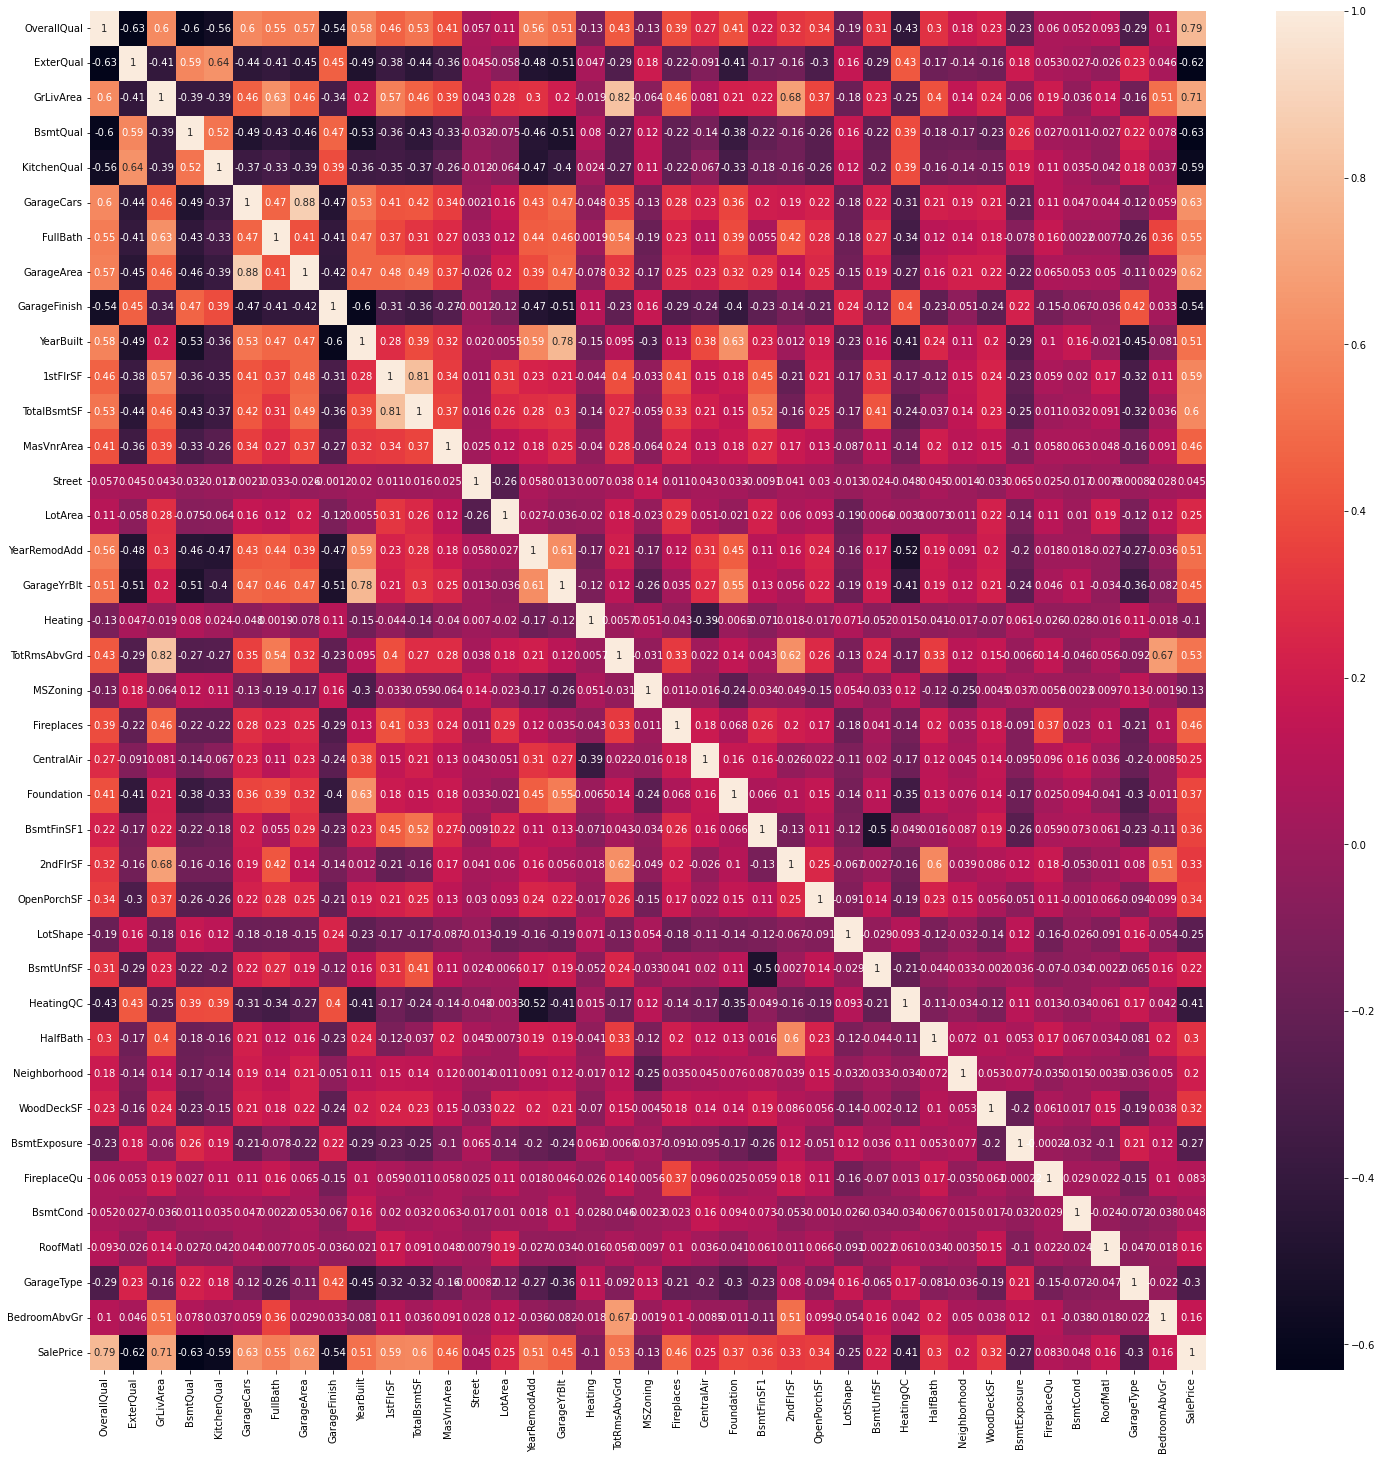

In [107]:
plt.figure(figsize = (25,25))
sns.heatmap(corr,annot = True,fmt = '.2g')
plt.show()

In [108]:
# 'TotRmsAbvGrd','GarageArea','TotalBsmtSF' have a very high correlation. SO no need to have thses columns

In [109]:
top.drop(columns = ['TotRmsAbvGrd','GarageArea','TotalBsmtSF'],axis = 1, inplace = True)

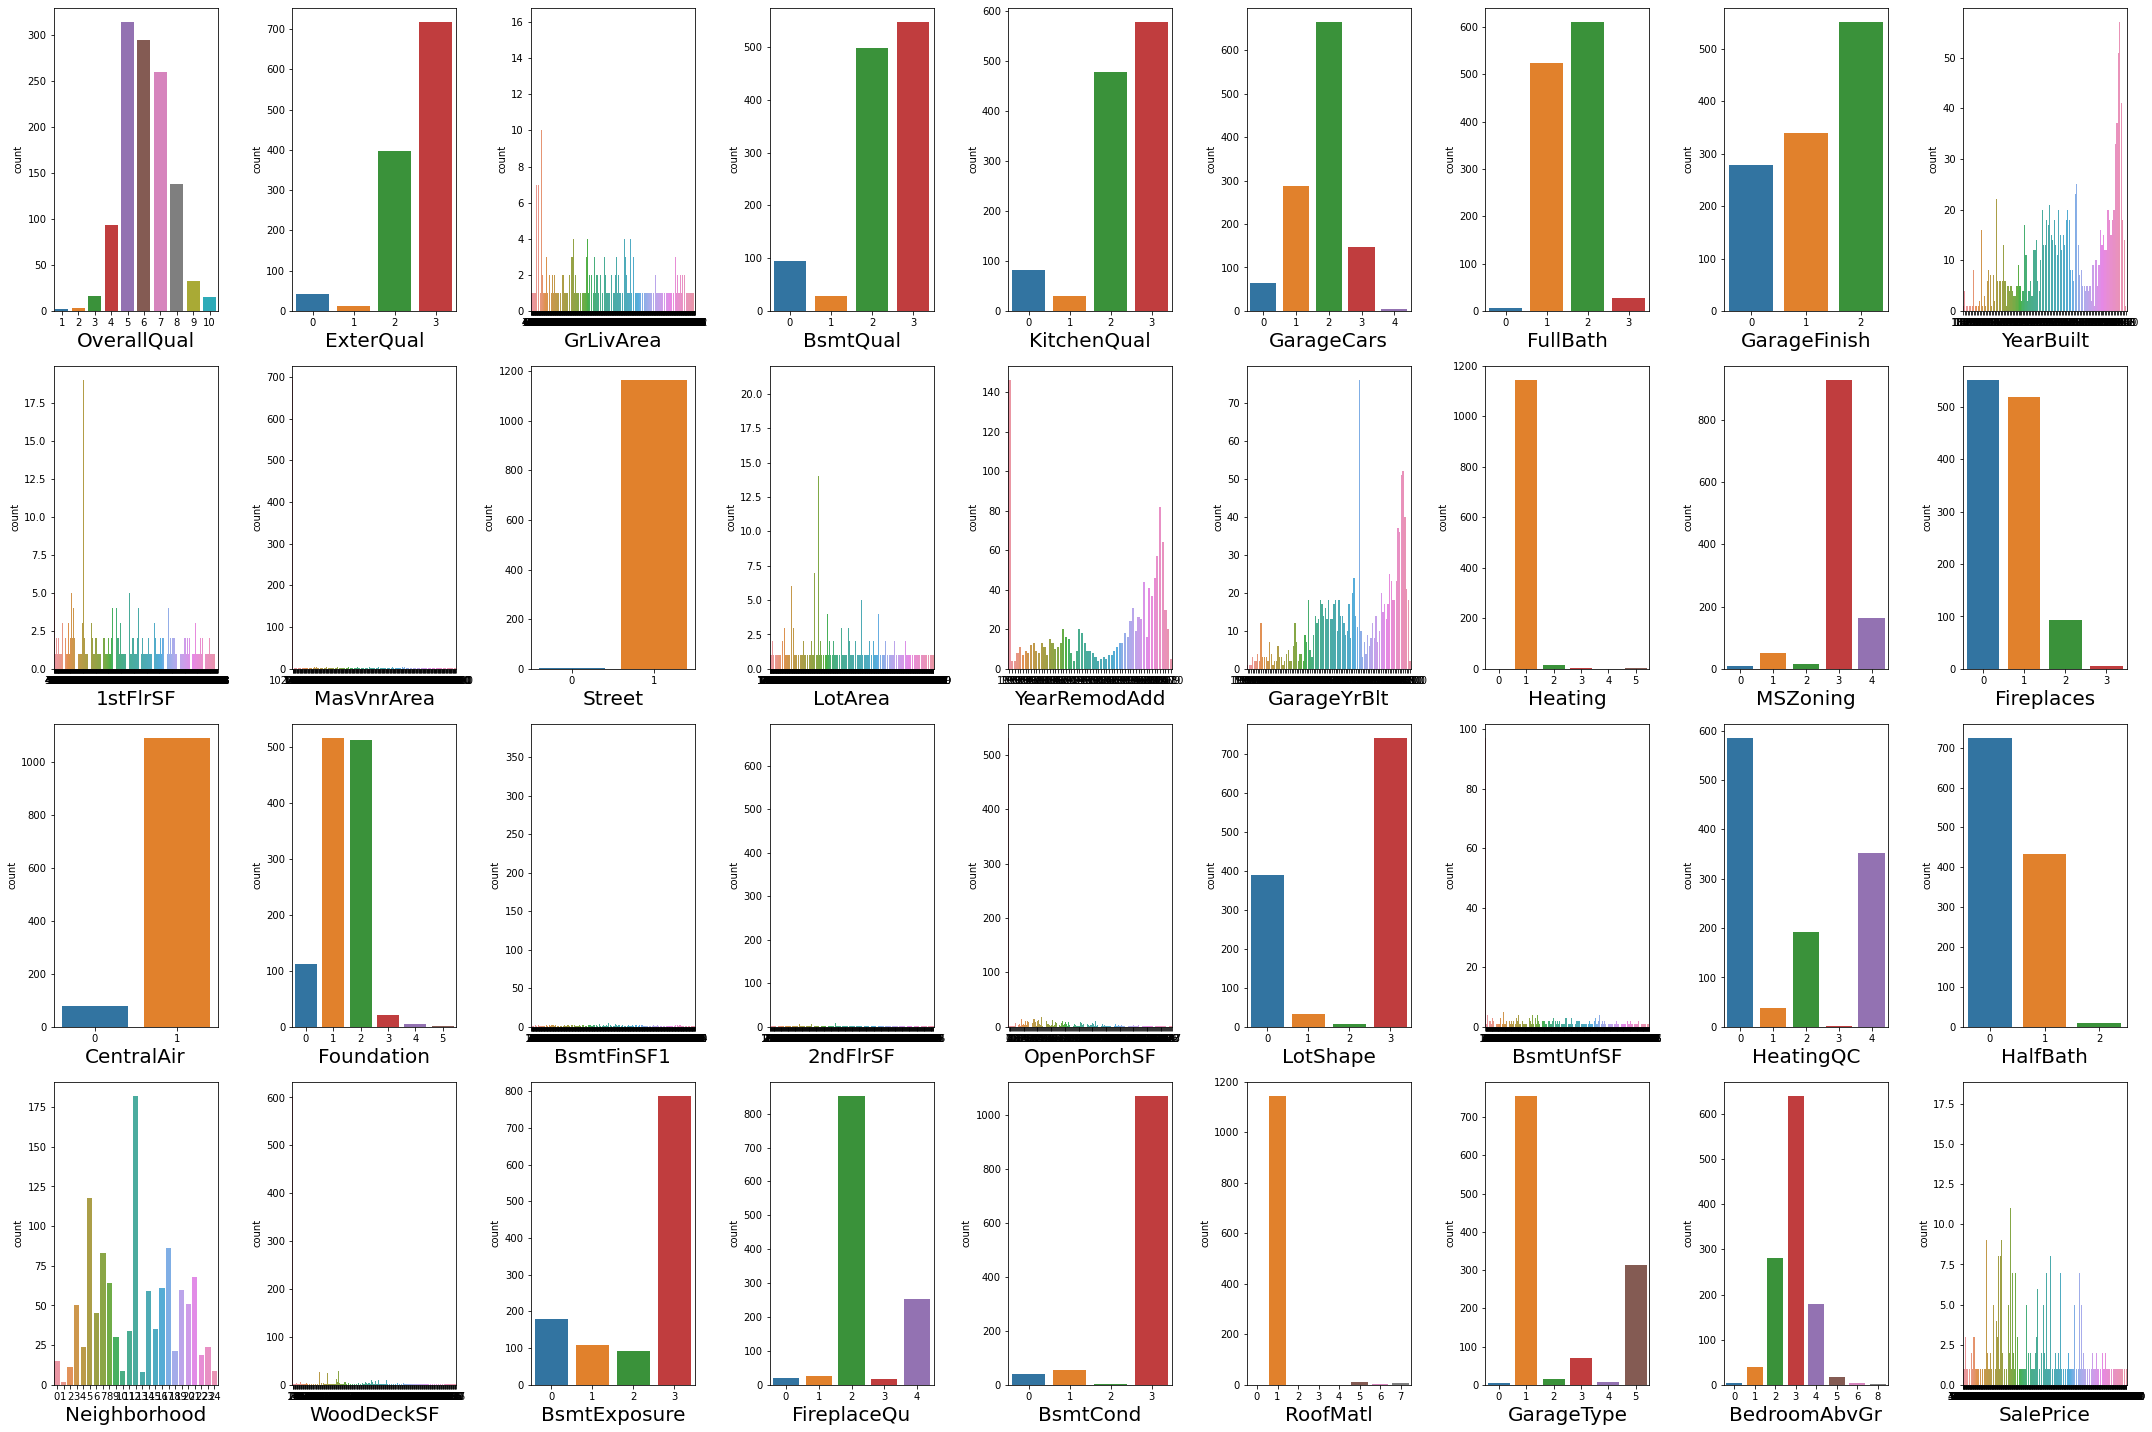

In [110]:
plt.figure(figsize = (30,20))
plotnumber = 1

for column in top:
    if plotnumber <= 36:
        ax = plt.subplot(4,9,plotnumber)
        sns.countplot(top[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

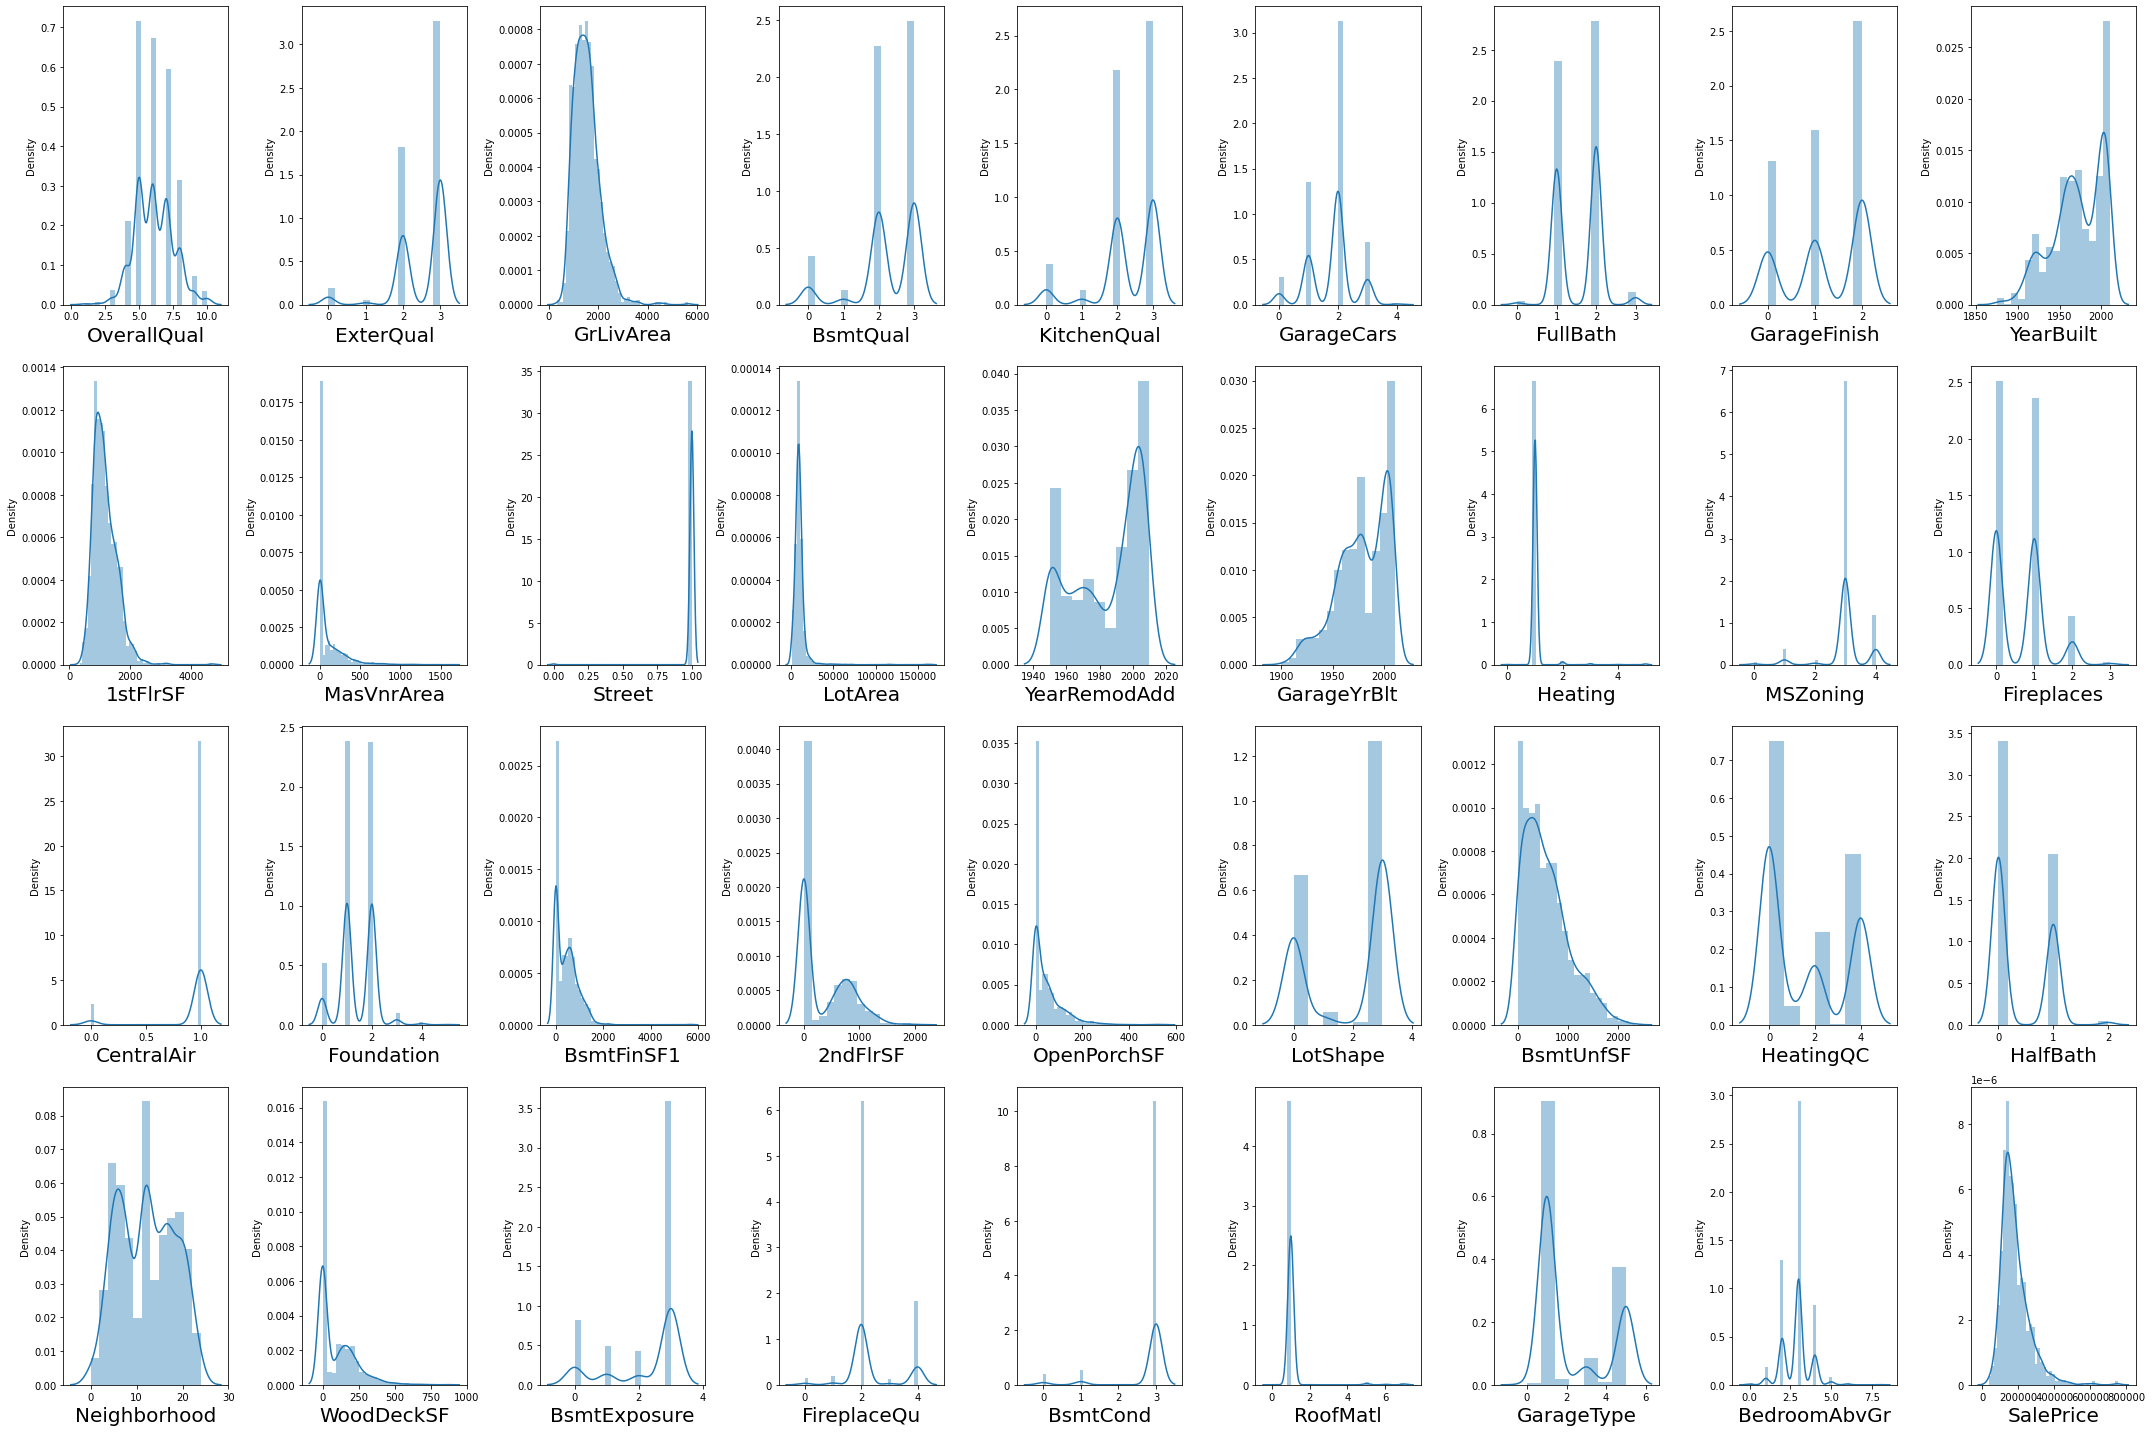

In [111]:
plt.figure(figsize = (30,20))
plotnumber = 1

for column in top:
    if plotnumber <= 36:
        ax = plt.subplot(4,9,plotnumber)
        sns.distplot(top[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

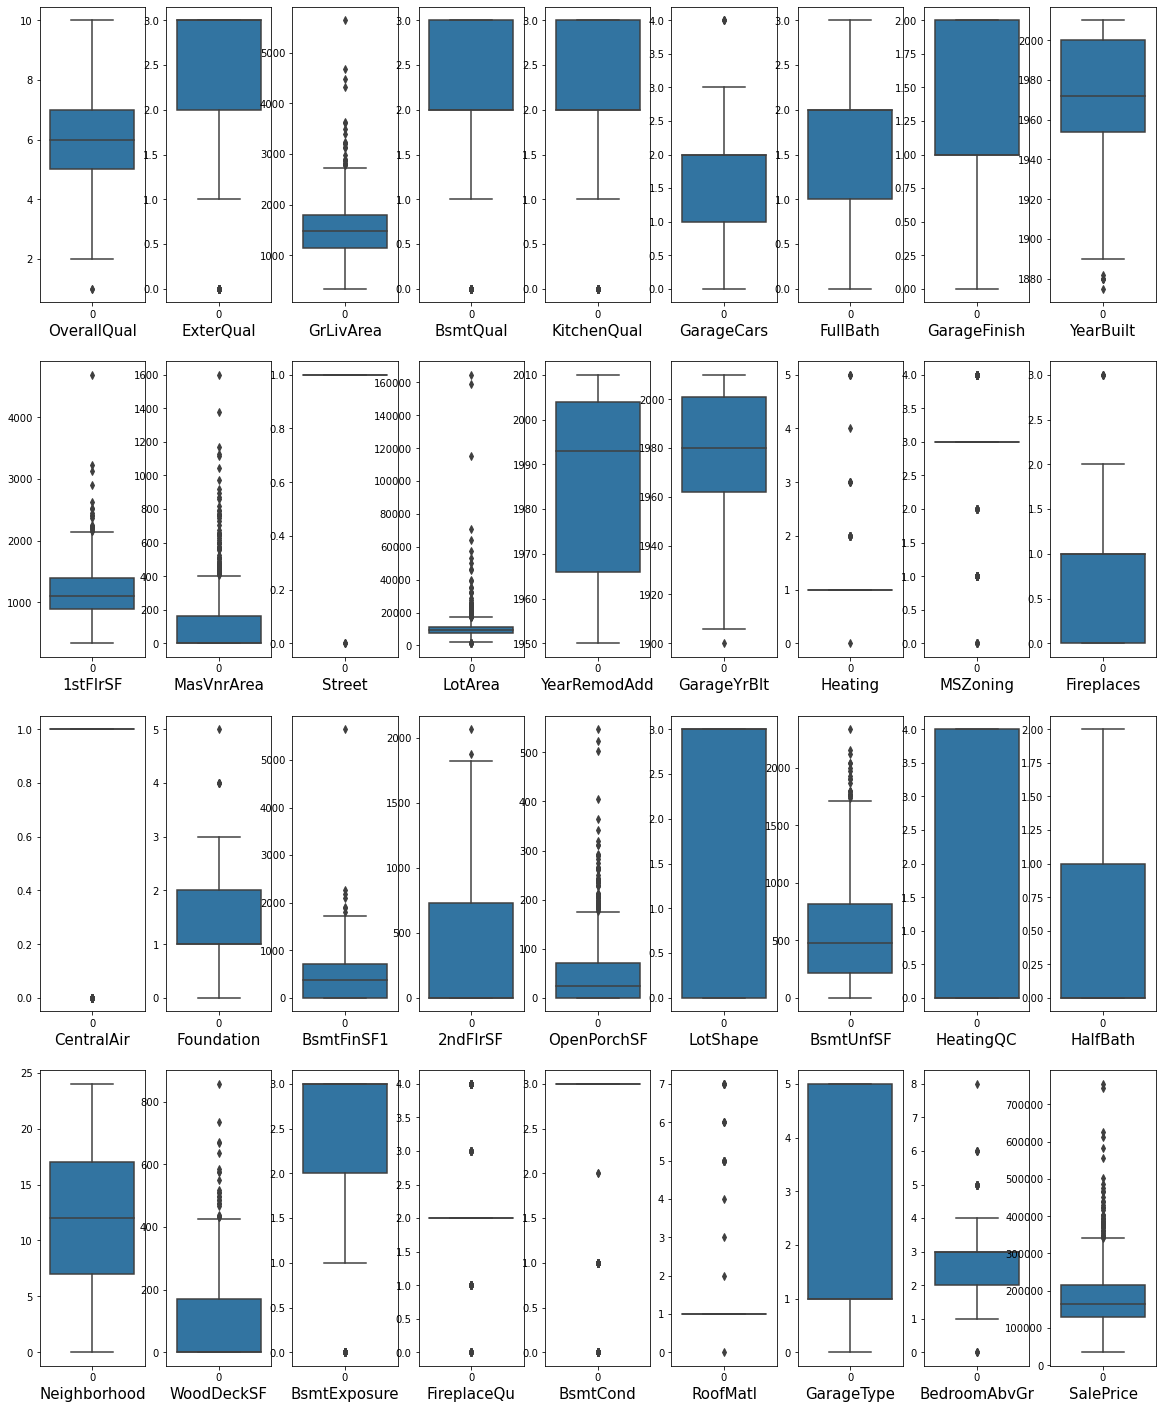

In [112]:
plt.figure(figsize = (20,25))
graph = 1
for column in top:
    if graph <= 50:
        plt.subplot(4,9,graph)
        ax = sns.boxplot(data = top[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

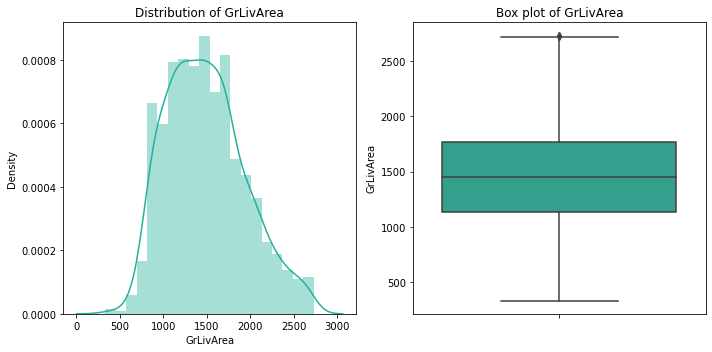

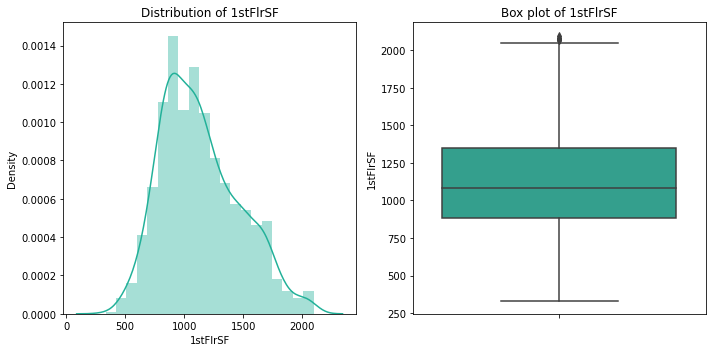

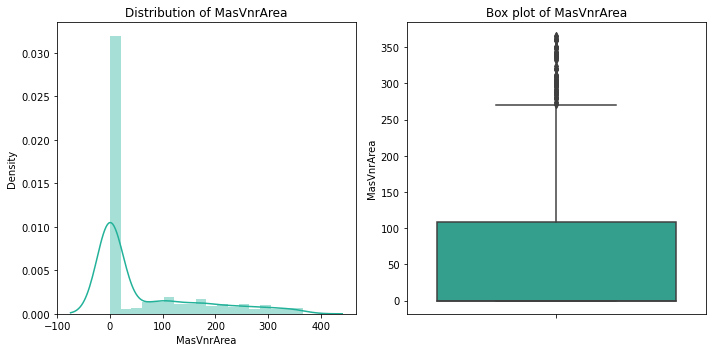

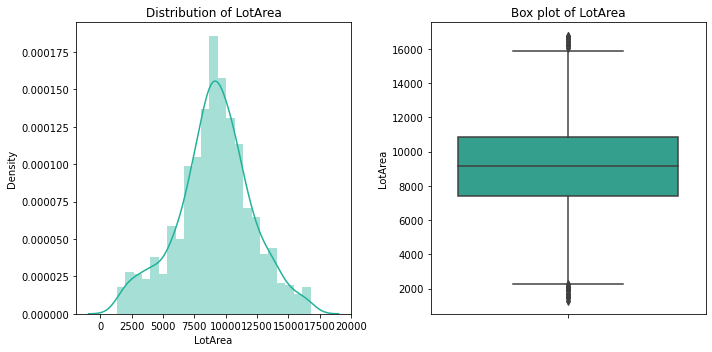

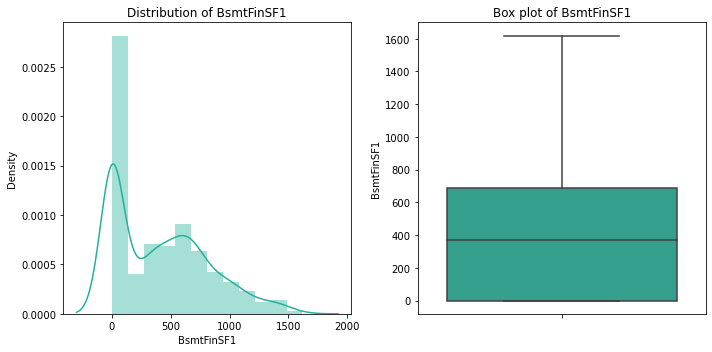

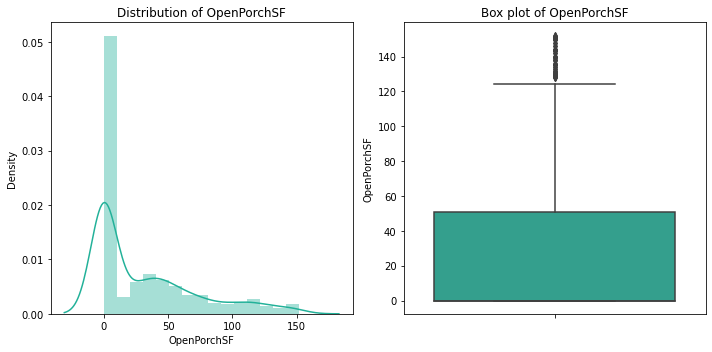

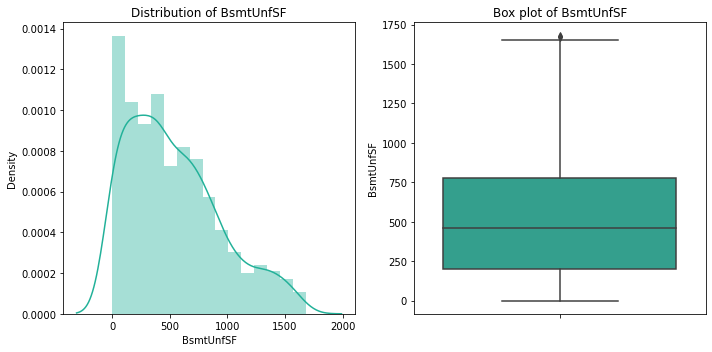

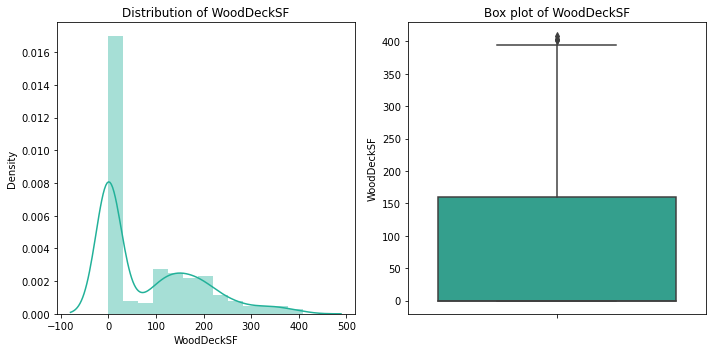

(923, 36)


In [113]:
def remove_outliers(x):
    global top
    Q1= top[x].quantile(0.25)
    Q3 = top[x].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    index = np.where(top[x] > upper_limit)
    top = top.drop(top.index[index])
    top.reset_index()
        
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(top[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=top[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of '+ x )
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['GrLivArea','1stFlrSF','MasVnrArea','LotArea','BsmtFinSF1','OpenPorchSF','BsmtUnfSF','WoodDeckSF']:
    remove_outliers(i)
print(top.shape)

In [114]:
X = top.drop('SalePrice',axis = 1)
y = top.SalePrice


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=90)

In [131]:
def score(reg, X_train, X_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(X_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(X_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))
        print('\n ----- Model Evalution ----- \n')
        print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred))
        print('\n Scatter Plot \n')
        plt.scatter(y_test, pred)
        plt.xlabel("Actual Sales")
        plt.ylabel("Predicted Sales")
        plt.title("Actual VS Prediction")
        plt.show()

In [132]:
lr = LinearRegression()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gb = GradientBoostingRegressor()
hgb = HistGradientBoostingRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()

# Linear Regression


 ----- Train Result ----- 

R2 Score: 0.8760041136039864

 ----- Test Result ----- 

R2 Score: 0.8971125451644469

 ----- Model Evalution ----- 

Mean Absolute Error: 14211.539583153666

 Scatter Plot 



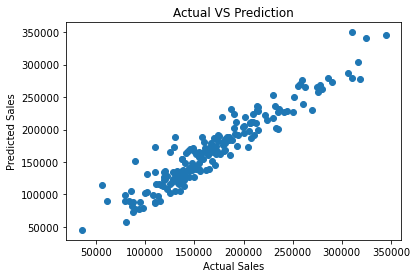

In [133]:
lr.fit(X_train,y_train)
score(lr, X_train,X_test,y_train,y_test,train = True)
score(lr, X_train,X_test,y_train,y_test,train = False)

# Random Forest


 ----- Train Result ----- 

R2 Score: 0.9806146630225827

 ----- Test Result ----- 

R2 Score: 0.8875449248537329

 ----- Model Evalution ----- 

Mean Absolute Error: 14540.165043243242

 Scatter Plot 



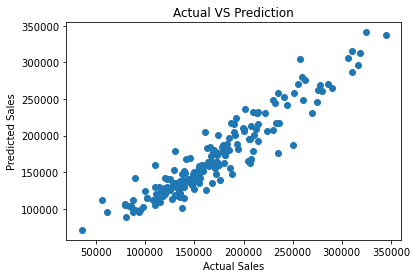

In [135]:
rf.fit(X_train,y_train)
score(rf, X_train,X_test,y_train,y_test,train = True)
score(rf, X_train,X_test,y_train,y_test,train = False)

# AdaBoost


 ----- Train Result ----- 

R2 Score: 0.8908715162020067

 ----- Test Result ----- 

R2 Score: 0.8612664600287813

 ----- Model Evalution ----- 

Mean Absolute Error: 16731.35464947113

 Scatter Plot 



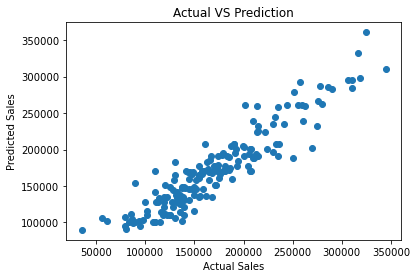

In [136]:
ada.fit(X_train,y_train)
score(ada, X_train,X_test,y_train,y_test,train = True)
score(ada, X_train,X_test,y_train,y_test,train = False)

# GradientBoost


 ----- Train Result ----- 

R2 Score: 0.9595292656376133

 ----- Test Result ----- 

R2 Score: 0.8920288998354449

 ----- Model Evalution ----- 

Mean Absolute Error: 14344.214204457745

 Scatter Plot 



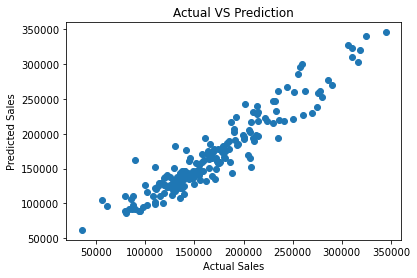

In [137]:
gb.fit(X_train,y_train)
score(gb, X_train,X_test,y_train,y_test,train = True)
score(gb, X_train,X_test,y_train,y_test,train = False)

# XGBoost


 ----- Train Result ----- 

R2 Score: 0.9999200464121489

 ----- Test Result ----- 

R2 Score: 0.8569479477466962

 ----- Model Evalution ----- 

Mean Absolute Error: 16353.914653716216

 Scatter Plot 



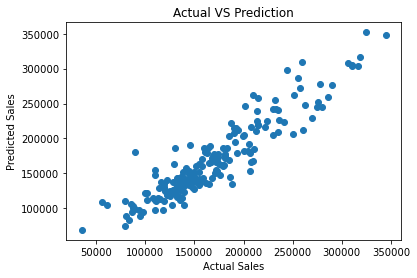

In [139]:
xgb.fit(X_train,y_train)
score(xgb, X_train,X_test,y_train,y_test,train = True)
score(xgb, X_train,X_test,y_train,y_test,train = False)

# KNN 


 ----- Train Result ----- 

R2 Score: 0.8754474973001353

 ----- Test Result ----- 

R2 Score: 0.836770321726306

 ----- Model Evalution ----- 

Mean Absolute Error: 17267.794594594594

 Scatter Plot 



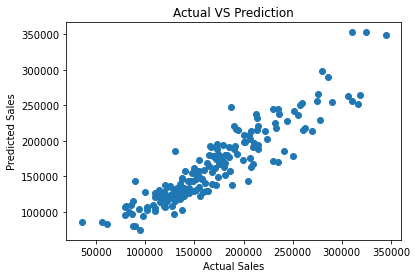

In [140]:
knn.fit(X_train,y_train)
score(knn, X_train,X_test,y_train,y_test,train = True)
score(knn, X_train,X_test,y_train,y_test,train = False)

# HistGradient Boosting


 ----- Train Result ----- 

R2 Score: 0.9870244410795318

 ----- Test Result ----- 

R2 Score: 0.8799940131761304

 ----- Model Evalution ----- 

Mean Absolute Error: 14616.643366379834

 Scatter Plot 



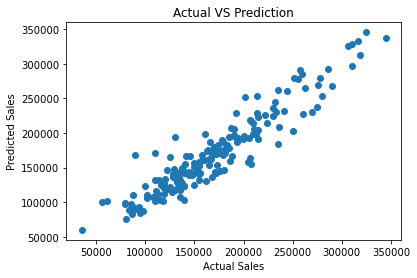

In [141]:
hgb.fit(X_train,y_train)
score(hgb, X_train,X_test,y_train,y_test,train = True)
score(hgb, X_train,X_test,y_train,y_test,train = False)

In [142]:
# GradientBoosting gives best score

# Hyperparameter Tuning

In [143]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [144]:
param = {'n_estimators':range(0,100,10),'learning_rate':[0.1,0.3,0.5,0.7,0.8,1.0],'criterion':['friedman_mse', 'squared_error'],'loss':['squared_error', 'absolute_error'],'random_state':range(1,10),
         'max_features':['auto', 'sqrt']}

In [146]:
grid = GridSearchCV(gb,param_grid = param)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_features': 'sqrt',
 'n_estimators': 90,
 'random_state': 2}

In [147]:
gb_hyp = GradientBoostingRegressor(criterion = 'friedman_mse',learning_rate =  0.1,loss = 'squared_error',max_features = 'sqrt',n_estimators = 90,random_state = 2)


 ----- Train Result ----- 

R2 Score: 0.95027979876775

 ----- Test Result ----- 

R2 Score: 0.9060750260311207

 ----- Model Evalution ----- 

Mean Absolute Error: 13037.56131117366

 Scatter Plot 



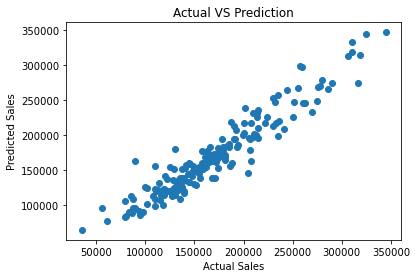

In [148]:
gb_hyp.fit(X_train,y_train)
score(gb_hyp, X_train,X_test,y_train,y_test,train = True)
score(gb_hyp, X_train,X_test,y_train,y_test,train = False)

# Working on Test set

In [150]:
test_df.columns[test_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [151]:
test_df.drop(columns = ['MiscFeature','PoolQC','Alley'],axis = 1, inplace = True)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].median())

In [152]:
def fill(x):
    test_df[x] = test_df[x].fillna(test_df[x].mode()[0])

In [153]:
n = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'GarageFinish','GarageQual','GarageCond','Fence','Electrical']

In [154]:
for i in n:
    fill(i)

In [156]:
test_df.columns[test_df.isnull().any()]

Index([], dtype='object')

In [157]:
test_df.drop('Utilities',axis = 1, inplace = True )

In [158]:
cat_test = []
for col in test_df:
    if test_df[col].dtype == 'object':
        cat_test.append(col)

In [159]:
le = LabelEncoder()
for i in cat_test:
    test_df[i] = le.fit_transform(test_df[i])

In [161]:
test_top = test_df[['OverallQual','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath','GarageFinish','YearBuilt','1stFlrSF','MasVnrArea','Street','LotArea','YearRemodAdd','GarageYrBlt','Heating','MSZoning','Fireplaces','CentralAir','Foundation','BsmtFinSF1','2ndFlrSF','OpenPorchSF','LotShape','BsmtUnfSF','HeatingQC','HalfBath','Neighborhood','WoodDeckSF','BsmtExposure','FireplaceQu','BsmtCond','RoofMatl','GarageType','BedroomAbvGr']]

In [162]:
y_pred = gb_hyp.predict(test_top)

In [163]:
predict = []
for i in y_pred:
    predict.append(i)

In [165]:
test = pd.DataFrame({'Predicted' : predict})
test.head()

,Predicted
0,310088.543882
1,290352.395591
2,257274.190800
3,279147.659430
4,299193.188175


In [ ]:
filename = 'Ho.pickle'
pickle.dump(gb_hyp, open(filename, 'wb'))